In [3]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%pylab inline

plt.rcParams["figure.figsize"] = (10,7)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Решение полиномиальной регрессии в матричной форме

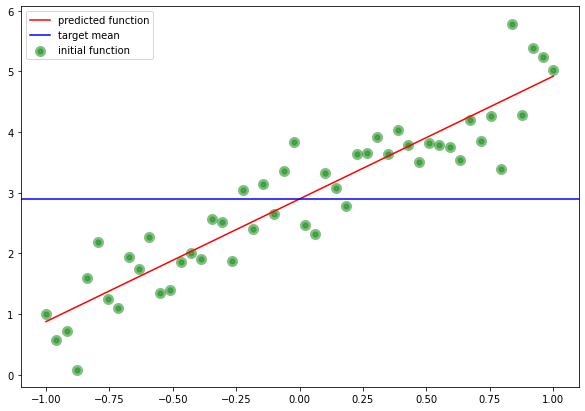

In [6]:
#linear case
x_array = np.linspace(-1,1,50)
y_array = np.array([2 * (x + np.random.normal(0,0.25)) + 3 for x in x_array])

X = np.array([x_array**0, x_array**1]).T
y = y_array.reshape(-1,1)

weights = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

plt.scatter(x_array, y_array, label='initial function', c = 'g',linewidths=5, alpha=0.5)
plt.plot(x_array, np.dot(X, weights), color='r',label='predicted function')
plt.axhline(y=np.mean(y_array), color='b', label='target mean')
plt.legend()

In [7]:
#calculate r squared
ls_error = np.sum((y_array.reshape(-1,1) - np.dot(X, weights))**2)/len(y_array)
y_variance = np.std(y_array)**2

def calculate_r_squared(variance, ls):
    return (variance - ls_error)/variance
    
    
print('R Squared: ', calculate_r_squared(y_variance, ls_error))

R Squared:  0.8596168668714614


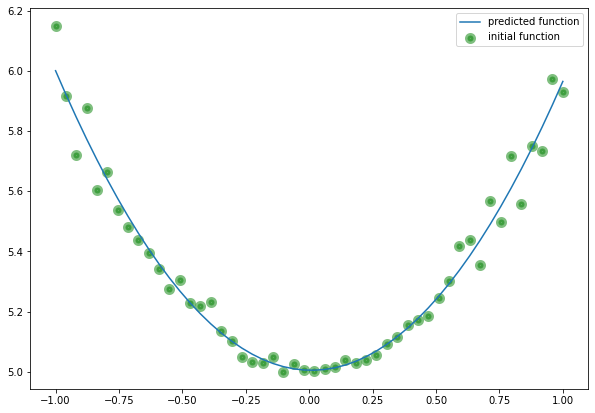

In [8]:
#form poly matrix
x_array = np.linspace(-1,1,50)
y_array = np.array([(x + np.random.normal(0,0.04))**2 + 5 for x in x_array])

X = np.array([x_array**0, x_array**1, x_array**2]).T
y = y_array.reshape(-1,1)

weights = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

plt.scatter(x_array, y_array, label='initial function', c = 'g',linewidths=5, alpha=0.5)
plt.plot(x_array, np.dot(X, weights), label='predicted function')
plt.legend()

### Обучение полиномиальной регрессии итеративным методом

In [9]:
x_array = np.linspace(-1,1,50)
y_array = np.array([(x + np.random.normal(0,0.08))**2 + 5 for x in x_array])
lr = 0.1
nsteps = 1000

Training time:  349.1320610046387
4.994604698832859 0.03275152136264303 1.0449649625974755


Text(0.5, 1.0, 'График лосса')

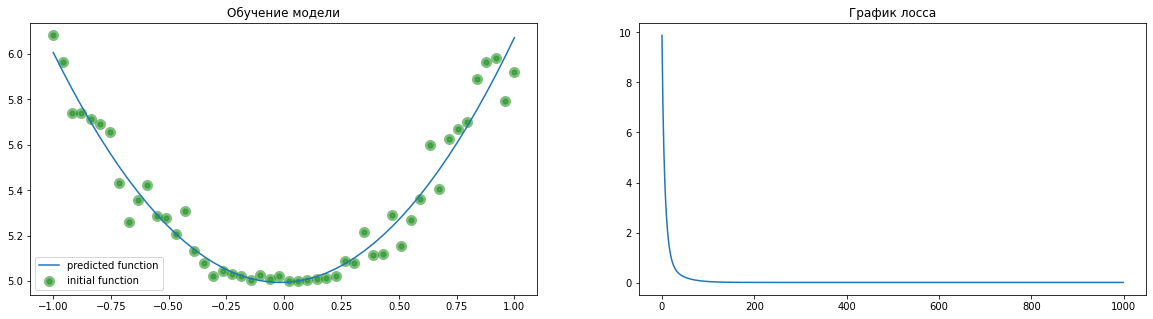

In [10]:
def polynom(x, w_0, w_1, w_2):
    return w_0 + w_1*x + w_2*x**2

def error_grad_w0(polynom_value, y):
    f_derive = 1
    error_grad = 2 * (polynom_value - y) * f_derive
    return error_grad

def error_grad_w1(polynom_value, y):
    f_derive = x
    error_grad = 2 * (polynom_value - y) * f_derive
    return error_grad

def error_grad_w2(polynom_value, y):
    f_derive = x**2
    error_grad = 2 * (polynom_value - y)* f_derive
    return error_grad


w_0 = 5
w_1 = 5
w_2 = 5
lr = 0.1
nsteps = 1000

loss_array = []
w_0_array, w_1_array, w_2_array = [], [], []
start_time = time.time()
for i in range(nsteps):
    w_0_error_grad = 0
    w_1_error_grad = 0
    w_2_error_grad = 0
    for x,y in zip(x_array,y_array):
        polynom_value = polynom(x,  w_0, w_1, w_2)
        w_0_error_grad += error_grad_w0(polynom_value, y)
        w_1_error_grad += error_grad_w1(polynom_value, y)
        w_2_error_grad += error_grad_w2(polynom_value, y)

    w_0 = w_0 - lr*w_0_error_grad/len(x_array)
    w_1 = w_1 - lr*w_1_error_grad/len(x_array)
    w_2 = w_2 - lr*w_2_error_grad/len(x_array)
    
    #loss calculation
    loss = 0
    for x,y in zip(x_array,y_array):
        polynom_value = polynom(x, w_0, w_1, w_2)
        loss += (polynom_value - y)**2
    average_loss = loss / len(x_array)
    loss_array.append(average_loss)
end_time = time.time()

print('Training time: ', (end_time - start_time) * 1000)

print(w_0, w_1, w_2)

#предскажем функцию
training_predictions = np.array([polynom(x, w_0, w_1, w_2) for x in x_array])
#изобразим функцию 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1.scatter(x_array, y_array, label='initial function', c = 'g',linewidths=5, alpha=0.5)
ax1.plot(x_array, training_predictions, label='predicted function')

ax1.set_title('Обучение модели')
ax1.legend()

ax2.plot(np.arange(len(loss_array)), loss_array)
ax2.set_title('График лосса')

### Практикум:

1) переписать итеративное решение в матричном виде для функции и вычислить коэфициент детерминации

2) Найти топ-5 самых полезных признаков для предсказания в датасете

3) Оценить модель на тестовом сете - метрики $R^2$ и RMSE

In [ ]:
#get data
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv

--2021-09-30 21:59:03--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 460676 (450K) [text/plain]
Сохранение в: «house_prices_train.csv.1»

house_prices_train. 100%[===================>] 449,88K  --.-KB/s    за 0,1s    

2021-09-30 21:59:04 (3,28 MB/s) - «house_prices_train.csv.1» сохранён [460676/460676]

--2021-09-30 21:59:04--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|

In [ ]:
df = pd.read_csv('house_prices_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2)

In [ ]:
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(df['LotFrontage'].mean())
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(df['LotFrontage'].mean())
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(df['MasVnrArea'].mean())
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [ ]:
num_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
                'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                'MiscVal', 'MoSold', 'YrSold']

In [ ]:
from scipy.stats import ncf, f

def calculate_significance(y_true, y_preds, coefs_num):
    
    ss_reg = ((y_true - y_preds) ** 2).sum(axis=0)
    ss_mean = ((y_true - np.average(y_true, axis=0)) ** 2).sum(axis=0)
    r_squared = (ss_mean - ss_reg) / ss_mean
    adj_r_squared = 1 - (len(y_true) - 1)/(len(y_true)- coefs_num - 1)*(1-r_squared)

    numerator = (ss_mean - ss_reg)/(coefs_num + 1 - 1)
    denumerator = ss_mean/(len(y_true) - coefs_num - 1)
    F = numerator / denumerator

    df1 = (coefs_num + 1 - 1)
    df2 = (len(y_true) - coefs_num - 1)

    p_value = 1 - ncf.cdf(F, df1, df2, 0)

    return {'p-value': p_value, 'F stat': F, 'r_squared': r_squared, 'adj_r_squared': adj_r_squared}

In [ ]:
#пример со случайным признаком
from sklearn.linear_model import LinearRegression


random_feature = np.random.normal(0, 1, len(y_train)).reshape(-1,1)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(random_feature, y_train)
pred = lin_reg.predict(random_feature)
calculate_significance(y_train, pred, lin_reg.coef_.shape[0])

{'p-value': 0.9019554780209879,
 'F stat': 0.015182746933140352,
 'r_squared': 1.3021223784854503e-05,
 'adj_r_squared': -0.0008446005418893954}

In [ ]:
#пример с одним из признаков
lin_reg = LinearRegression(fit_intercept=True)
our_features = ['MSSubClass']
lin_reg.fit(X_train[our_features], y_train)
pred = lin_reg.predict(X_train[our_features])
calculate_significance(y_train, pred, lin_reg.coef_.shape[0])

{'p-value': 0.006332869621032411,
 'F stat': 7.480146237055856,
 'r_squared': 0.006415219757337783,
 'adj_r_squared': 0.005563088727970178}

In [ ]:
#все признаки
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train[num_features], y_train)
pred = lin_reg.predict(X_train[num_features])
calculate_significance(y_train, pred, lin_reg.coef_.shape[0])

{'p-value': 0.0,
 'F stat': 28.3359018676093,
 'r_squared': 0.7988976738004384,
 'adj_r_squared': 0.7932278284802745}